## Importing Libraries

Python 3.9.12


## Data Exploration

In [1]:
import pandas as pd
import glob
# reading all files
df_list = [pd.read_parquet(filename) for filename in glob.glob('data/*.parquet')] 
df = pd.concat(df_list , axis = 0)
df.reset_index(drop=True , inplace=True)

In [2]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,NaN,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,NaN,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,NaN,B00037


In [3]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                          float64
Affiliated_base_number            object
dtype: object

In [4]:
print(f'Total number of records : {len(df)}')
print(f'Total number of records in the month of january : {len(df_list[0])}')
print(f'Total number of records in the month of February : {len(df_list[1])}')

Total number of records : 2191804
Total number of records in the month of january : 1154112
Total number of records in the month of February : 1037692


In [5]:
(df['dropOff_datetime'].isna()).count() == len(df)
(df['pickup_datetime'].isna()).count() == len(df)

True

### What's the average trip duration in January?

In [6]:
from datetime import timedelta
df['duration'] =(df['dropOff_datetime'] - df['pickup_datetime']).apply( lambda x : round(x.total_seconds()/60 , 2))
print(f"Avg trip Duration in Minutes : { df['duration'].sum()/len(df) }")

Avg trip Duration in Minutes : 19.896217047692218


In [7]:
df['duration']

0           17.00
1           17.00
2          110.00
3            8.28
4           15.22
            ...  
2191799     13.53
2191800     11.47
2191801     25.38
2191802     18.05
2191803     16.00
Name: duration, Length: 2191804, dtype: float64

In [116]:
df['duration'] < round(df['duration'].quantile(.75))

0           True
1           True
2          False
3           True
4           True
           ...  
2191799     True
2191800     True
2191801    False
2191802     True
2191803     True
Name: duration, Length: 2191804, dtype: bool

In [9]:
IQR = df['duration'].quantile(.75)  - df['duration'].quantile(.25)
upper_Q , lower_Q = (IQR * 1.5) + df['duration'].quantile(.75) , (IQR * 1.5) - df['duration'].quantile(.25)


In [10]:
data = df['duration'].astype(int)

In [172]:
([data > round(lower_Q)]) & (data[data < round(upper_Q)])

In [24]:
(data[data > round(lower_Q)])  & (data[data < round(upper_Q)])

Affiliated_base_number    False
DOlocationID              False
PUlocationID              False
SR_Flag                   False
dispatching_base_num      False
dropOff_datetime          False
duration                  False
pickup_datetime           False
dtype: bool

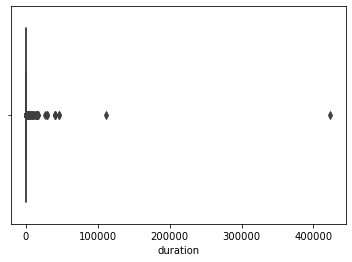

In [13]:
import seaborn as sns
ax = sns.boxplot(x=df["duration"])

### What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.



In [14]:
# Total Nan values
print(f'ratio of PUlocationID : {round(df.PUlocationID.isnull().sum()/len(df) * 100 , 2) } %')

ratio of PUlocationID : 84.08 %


### Apply One hot encoding to Pickup and Dropoff location ID

In [26]:
df.fillna(1 , inplace=True)

In [15]:
df.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [32]:
data = df[['PUlocationID' ,'DOlocationID']]

In [35]:
final_df = pd.get_dummies(data, columns=['PUlocationID' , 'DOlocationID'])
len(final_df.columns)

In [43]:
import numpy as np
X = np.array(final_df)
y = np.array(df['duration'])

### Trainning a ,model

In [44]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

: 

: 

In [ ]:
y_pred = regr.predict(X_test)